This project focuses on cleaning the starwars survey dataset and performing some rudimentary analysis of the data. We limit the scope of analysis to starwars movies and demographics, not diving into the analysis of starwars characters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

# views dataframe borders

# Data Cleaning

###  Viewing Data

In [4]:
starwars_survey = pd.read_csv('star_wars.csv',encoding="ISO-8859-1")#read star wars data

In [5]:
starwars_survey.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [6]:
starwars_survey.iloc[0:5,10:20] #viewing some more columns

,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi
1,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably
4,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


In [7]:
starwars_survey.RespondentID.value_counts(dropna = False).tail(1) # we have 1 Nan for id. We can see above it is the first row.

NaN    1
Name: RespondentID, dtype: int64

In [8]:
starwars_survey = starwars_survey.loc[1:,:] # removing first row as it doesn't describe a response

For some questions, the respondent had to check one or more boxes. This has resulted in the data being scattered out to multiple columns, with each column representing a possible answer/checkbox.Looking at the dataframe, we can see that the first row represents the  answer choices available and the rows below that represent the answer. 

In [9]:
starwars_survey.describe(include = [object]) #describe all datatypes

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1186,836,673,571,550,607,758,738,835,836,...,826,828,828,213,1068,1046,1046,858,1036,1043
unique,2,2,1,1,1,1,1,1,6,6,...,6,3,2,2,2,2,4,5,5,9
top,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,5,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,936,552,673,571,550,607,758,738,237,300,...,605,325,615,114,641,549,291,298,328,181


### Cleaning column names

We can see a brief summary of the number of unique values in each column. For e.g. the unnamed column 4 to 8 have only one type of value throughout. The rankings have 6 types of values.

In [10]:
starwars_survey.columns #viewing all column names

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data for each question is scattered out to multiple columns, with each column representing a possible answer/checkbox. These are represented by the 'Unnamed : 00' columns, which contain answer to the question that follows before it. These unnamed columns contain a null value if the box was not checked. Lets rename the columns such that the column name represent the answer choice. For e.g. <br><br> format-> `'old name'`:`'new name'`<br>

`'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen1'`<br> #column `'seen1'` represents answers for whether star wars part 1 was seen by the respondent.<br><br>
`'Unnamed: 4' : 'seen2'`  #column `'seen2'` represents answers for whether part 2 was seen by the respondent<br>
`'Unnamed: 16' : 'Luke Skywalker'` #column `'Luke Skywalker'` represents answers for whether the repondent views the characters favourably. 

In [11]:
starwars_survey.columns = ['id', #renaming columns as discussed above
       'seen_any','fan',
       'seen1','seen2', 'seen3', 'seen4', 'seen5', 'seen6',
       'rank_p1','rank_p2', 'rank_p3', 'rank_p4', 'rank_p5','rank_p6',
       'Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader', 
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2','Jar Jar Binks', 'Padme Amidala', 'Yoda', 'character_shot_first',
       'familiar_exp_uni','fan_exp_universe','fan_startrek_franchise?',
       'gender', 'age', 'income', 'education','location']

In [12]:
starwars_survey.head(2)

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,rank_p1,...,Yoda,character_shot_first,familiar_exp_uni,fan_exp_universe,fan_startrek_franchise?,gender,age,income,education,location
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Columns `seen1` to `seen6` describe the responses to 1 particular question. Columns `rank_p1` to `rank_p6` have the responses to another question. Lets store all this data so that we know what column represents the responses to what question. 

In [13]:
info = {}
info['q1'] = ['Have you seen any of the 6 films in the Star Wars franchise?',['seen_any']]
info['q2'] = ['Do you consider yourself to be a fan of the Star Wars film franchise?',['fan']]
info['q3'] = ['Which of the following Star Wars films have you seen? Please select all that apply.',
             ['seen1','seen2', 'seen3', 'seen4', 'seen5', 'seen6']]
info['q4'] = ['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
             ['rank_p1','rank_p2', 'rank_p3', 'rank_p4', 'rank_p5','rank_p6']]
info['q5'] = [ 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
             [ 'Han Solo', 'Luke Skywalker', 'Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine',
              'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2','Jar Jar Binks', 'Padme Amidala', 'Yoda']]
info['q6'] = ['Are you familiar with the Expanded Universe?',['familiar_exp_uni']]
info['q7'] =  ['Do you consider yourself to be a fan of the Expanded Universe?',['fan_exp_universe']]
info['q8'] = ['Do you consider yourself to be a fan of the Star Trek franchise?',['fan_startrek_franchise?']]

In [14]:
info['q3'] # we can refer to this dictionary to check which column represents the responses to which questions. 

['Which of the following Star Wars films have you seen? Please select all that apply.',
 ['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6']]

### Creating new dataframe with limited columns

Lets create a new dataframe `starwars` which contains information for the questions about whether respondent saw the movies and their rankings. That way we can eliminate other columns in the data for now and focus on a specific problem. We will keep the demographic information as that might be useful for analysis.

In [15]:
starwars = starwars_survey[['id','seen_any','fan','seen1','seen2', 'seen3', 'seen4', 'seen5', 'seen6','rank_p1','rank_p2',
           'rank_p3', 'rank_p4', 'rank_p5','rank_p6','gender', 'age', 'income', 'education','location']].copy()

In [16]:
starwars.head(4)

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,rank_p1,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6,gender,age,income,education,location
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We can also create a heirarchical indexed dataframe which also contains the questions in the columns index. This makes the data frame easier to read.

In [17]:
df1 = starwars[['id','seen_any','fan','seen1','seen2', 'seen3', 'seen4', 'seen5', 'seen6']].copy()

In [18]:
upper = ['Respondent_ID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.','Which of the following Star Wars films have you seen? Please select all that apply.','Which of the following Star Wars films have you seen? Please select all that apply.','Which of the following Star Wars films have you seen? Please select all that apply.','Which of the following Star Wars films have you seen? Please select all that apply.','Which of the following Star Wars films have you seen? Please select all that apply.']
lower = ['id','seen_any','fan','seen1','seen2', 'seen3', 'seen4', 'seen5', 'seen6']
df1.columns = pd.MultiIndex.from_arrays((upper, lower))

In [19]:
df1.head(3)

Respondent_ID Have you seen any of the 6 films in the Star Wars franchise?  \
             id                                                     seen_any   
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
                                                                    fan   
1                                                Yes                      
2                                                NaN                      
3                                                 No                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
                                                                                seen1   
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    

                                                \
                                         seen2   
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   

                                                \
                                         seen3   
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   

                                      \
                               seen4   
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   

                                                 \
                                          seen5   
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   

                                             
                                      seen6  
1  Star Wars: Episode VI Return of the Jedi  
2                                       NaN  
3                                       NaN

We can see that the dataframe above is much easier to read. However, it will be tedious to access data using herarchical indexing, hence we will work with our intial data frame for further analysis. 

### Modifying data within columns

In [20]:
# converting id column to string type
starwars.loc[:,'id'] = starwars['id'].astype('int64').astype('str')
type(starwars.id[1])

str

Now we'll convert Yes to True and No to False for the first 2 columns to make it easier for analysis.

In [21]:
starwars.fan.unique()

array(['Yes', nan, 'No'], dtype=object)

In [22]:
modify = {'Yes': True, 'No':False}

In [23]:
starwars['fan'] = starwars.fan.map(modify) #using dictionary to change the respective values

In [24]:
starwars.seen_any.unique()

array(['Yes', 'No'], dtype=object)

In [25]:
starwars.seen_any =starwars.seen_any.map(modify)

In [26]:
starwars.head(5)

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,rank_p1,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6,gender,age,income,education,location
1,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [27]:
info['q3']

['Which of the following Star Wars films have you seen? Please select all that apply.',
 ['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6']]

In [28]:
all_parts = ['seen1','seen2', 'seen3', 'seen4', 'seen5', 'seen6'] #all answers to q3

In [29]:
info['q4']

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 ['rank_p1', 'rank_p2', 'rank_p3', 'rank_p4', 'rank_p5', 'rank_p6']]

In [30]:
all_ranks = info['q4'][1] #all answers to q4. This column will be useful to work with multiple columns simultaneousy. 

In [31]:
starwars[all_parts].describe() #only 1 unique answer for each column.

,seen1,seen2,seen3,seen4,seen5,seen6
count,673,571,550,607,758,738
unique,1,1,1,1,1,1
top,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
freq,673,571,550,607,758,738


In [32]:
#converting non null values to true  for all columns that answer q3. This way we have all answers in boolean form.
for i in all_parts:
    starwars.loc[starwars[i].notnull(),i] = True

In [33]:
starwars

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,rank_p1,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6,gender,age,income,education,location
1,3292879998,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,True,True,True,NaN,NaN,NaN,1,2,3,4,5,6,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,True,True,True,True,True,True,True,True,1,4,3,6,5,2,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3292684787,True,True,True,True,True,True,True,True,6,5,4,3,1,2,Male,18-29,NaN,High school degree,East North Central
8,3292663732,True,True,True,True,True,True,True,True,4,5,6,3,2,1,Male,18-29,NaN,High school degree,South Atlantic
9,3292654043,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3292640424,True,False,NaN,True,NaN,NaN,NaN,NaN,1,2,3,4,5,6,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


All NaN values in the dataframe indicate that the particular option was not selected by the respondent. 

#### Adding new column for total movies seen

In [34]:
# Counting the total number of movies seen by the responsdent
def count_of_movies_seen(row):
    count = 0
    for i in row:
        if i==True:
            count += 1
    return count

starwars['total_seen'] = starwars[all_parts].apply(count_of_movies_seen,axis=1)

In [35]:
# rearranging dataframe columns
starwars = starwars[['id', 'seen_any', 'fan', 'seen1', 'seen2', 'seen3', 'seen4', 'seen5',
       'seen6','total_seen', 'rank_p1', 'rank_p2', 'rank_p3', 'rank_p4', 'rank_p5',
       'rank_p6', 'gender', 'age', 'income', 'education', 'location'
       ]]


In [36]:
starwars.loc[17:21,:] #viewing the count of total movies seen.

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,total_seen,...,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6,gender,age,income,education,location
17,3292580516,True,True,NaN,NaN,NaN,True,NaN,NaN,1,...,1,2,3,5,6,Male,18-29,"$50,000 - $99,999",Bachelor degree,New England
18,3292572872,True,True,True,True,True,NaN,NaN,True,4,...,2,3,4,5,6,Male,18-29,NaN,Some college or Associate degree,Middle Atlantic
19,3292565282,True,True,True,True,True,True,True,True,6,...,5,2,3,1,4,Male,18-29,NaN,High school degree,South Atlantic
20,3292562297,True,True,True,True,True,True,True,True,6,...,5,1,4,3,2,Male,18-29,"$50,000 - $99,999",Some college or Associate degree,West North Central
21,3292522349,True,True,True,True,True,True,True,True,6,...,5,4,1,2,3,Male,18-29,NaN,Some college or Associate degree,Pacific


In [37]:
# starwars.loc[(starwars.seen_any==True)&(starwars.total_seen==0)]

In [38]:
info['q4']

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 ['rank_p1', 'rank_p2', 'rank_p3', 'rank_p4', 'rank_p5', 'rank_p6']]

In [39]:
all_ranks

['rank_p1', 'rank_p2', 'rank_p3', 'rank_p4', 'rank_p5', 'rank_p6']

Now lets clean wthe all_ranks columns which are answers to q4.

In [40]:
starwars[all_ranks].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 6 columns):
rank_p1    835 non-null object
rank_p2    836 non-null object
rank_p3    835 non-null object
rank_p4    836 non-null object
rank_p5    836 non-null object
rank_p6    836 non-null object
dtypes: object(6)
memory usage: 55.7+ KB


These are of the object type. Lets convert them to numeric so as to be able to calculate aggregate statistics.

In [41]:
for i in all_ranks:
    starwars[i] = pd.to_numeric(starwars[i])

In [42]:
starwars[all_ranks].info()  #All values have been successfully converted to numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 6 columns):
rank_p1    835 non-null float64
rank_p2    836 non-null float64
rank_p3    835 non-null float64
rank_p4    836 non-null float64
rank_p5    836 non-null float64
rank_p6    836 non-null float64
dtypes: float64(6)
memory usage: 55.7 KB


In [43]:
starwars.loc[:,'gender':'location'].describe()

,gender,age,income,education,location
count,1046,1046,858,1036,1043
unique,2,4,5,5,9
top,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,549,291,298,328,181


In [44]:
starwars.head()

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,total_seen,...,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6,gender,age,income,education,location
1,3292879998,True,True,True,True,True,True,True,True,6,...,2.0,1.0,4.0,5.0,6.0,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,True,True,True,NaN,NaN,NaN,3,...,2.0,3.0,4.0,5.0,6.0,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,6,...,6.0,1.0,2.0,4.0,3.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,6,...,4.0,6.0,2.0,1.0,3.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Exploratory Analysis

###  Movies seen

In [45]:
starwars.loc[starwars.total_seen>0,'total_seen'].mean()

4.667065868263473

Of all those respondents who saw a starwars movie, the average numbers of movie seen per respondent is 4.6

Most seen movies

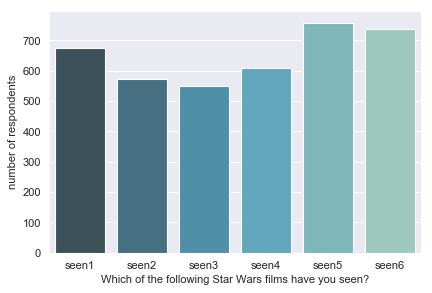

In [46]:
fig = plt.figure(dpi=80)
sns.set_style('darkgrid')
sns.barplot(y=starwars[all_parts].sum(),x=all_parts,palette="GnBu_d")
plt.xlabel('Which of the following Star Wars films have you seen?')
plt.ylabel('number of respondents')
plt.show()

Clearly, episode 5 is the most seen movie. It is important to note that parts 3 to 6 were released before parts 1 to 3. Lets arrange this bar plot by the release dates.

In [47]:
release_dates = ['p4-1977','p5-1980','p6-1983','p1-1999','p2-2002','p3-2005']
new_order = ['seen4','seen5','seen6','seen1','seen2','seen3']
new_order_rank = ['rank_p4','rank_p5','rank_p6','rank_p1','rank_p2','rank_p3']

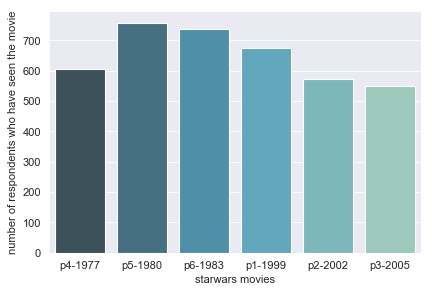

In [48]:
fig = plt.figure(dpi=80)
sns.barplot(y=starwars[new_order].sum(),x=release_dates,palette="GnBu_d")
plt.xlabel('starwars movies')
plt.ylabel('number of respondents who have seen the movie')
plt.show()

In [49]:
info['q3']

['Which of the following Star Wars films have you seen? Please select all that apply.',
 ['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6']]

This tells us that newer starwars movies are less popular. Lets check the average ranks for all movies to see if we see a similar trend. Here we will consider the rankings of all participants, irrespective of whether they have seen the movie or not. 

### Ranking for movies

In [50]:

starwars[new_order_rank].mean().sort_values()


rank_p5    2.513158
rank_p6    3.047847
rank_p4    3.272727
rank_p1    3.732934
rank_p2    4.087321
rank_p3    4.341317
dtype: float64

Lower the rank, the more the fans liked it. Here we can see that the part 5 was the favourite as well as the most seen and part 3 is the worst ranked as well as the least seen. If we consider the responses of only those participants who have seen all 6 movies, we get a similar result as shown below.

In [51]:
starwars.loc[starwars['total_seen'] == 6,:][new_order_rank].mean().sort_values()

rank_p5    2.380042
rank_p4    2.866242
rank_p6    2.932059
rank_p1    4.237792
rank_p3    4.253191
rank_p2    4.326964
dtype: float64

In [52]:
starwars['rank_p1'].value_counts().loc[1]

129

In [53]:
first_ranks_list = [] #creating a list of count of first ranks for starwars movies
for i in new_order_rank:
    first_ranks_list.append(starwars[i].value_counts().loc[1])

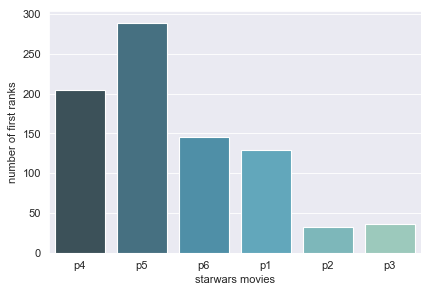

In [54]:
fig = plt.figure(dpi=80)
sns.barplot(y=first_ranks_list,x=['p4','p5','p6','p1','p2','p3'],palette="GnBu_d")
plt.xlabel('starwars movies')
plt.ylabel('number of first ranks')
plt.show()

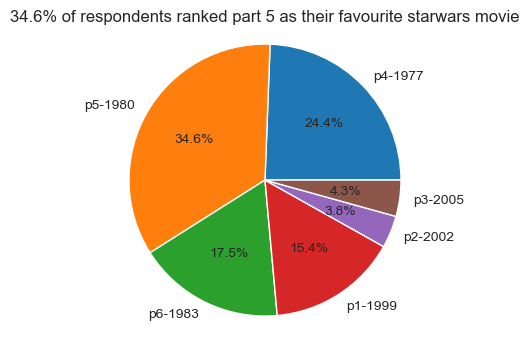

In [55]:
#Pie chart showing the share of first ranks given by respondents for starwars movies part 1-6
fig1, ax1 = plt.subplots(dpi=100)
ax1.pie(first_ranks_list,labels = release_dates,autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('34.6% of respondents ranked part 5 as their favourite starwars movie')

### Analysis by age

In [56]:
starwars.age.value_counts().sort_index()

18-29    218
30-44    268
45-60    291
> 60     269
Name: age, dtype: int64

In [57]:
starwars.groupby('age').mean()

,seen_any,total_seen,rank_p1,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6
age,,,,,,,,
18-29,0.825688,4.243119,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,0.772388,3.936567,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,0.824742,3.663230,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,0.717472,2.895911,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


We will create a new dataframe that contanins reponses from only those respondents who have seen atleast 1 starwars movie. 

In [58]:
sw = starwars[starwars['total_seen']>0].copy()

In [59]:
sw.head()

,id,seen_any,fan,seen1,seen2,seen3,seen4,seen5,seen6,total_seen,...,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6,gender,age,income,education,location
1,3292879998,True,True,True,True,True,True,True,True,6,...,2.0,1.0,4.0,5.0,6.0,Male,18-29,NaN,High school degree,South Atlantic
3,3292765271,True,False,True,True,True,NaN,NaN,NaN,3,...,2.0,3.0,4.0,5.0,6.0,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,6,...,6.0,1.0,2.0,4.0,3.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,6,...,4.0,6.0,2.0,1.0,3.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,True,True,True,True,True,True,True,True,6,...,4.0,3.0,6.0,5.0,2.0,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [60]:
sw.groupby('age').mean()

,seen_any,total_seen,rank_p1,rank_p2,rank_p3,rank_p4,rank_p5,rank_p6
age,,,,,,,,
18-29,True,5.138889,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,True,5.096618,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,True,4.441667,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,True,4.057292,3.015707,3.765625,4.317708,3.802083,2.739583,3.343750


Here we see that younger people have seen more movies on average compared to the older generation. Lets explore more to see which movies they haven't seen that younger respondents have. The table below shows what percentage of respondents in each age group have seen a particular movie. 

In [61]:
# Breaking down by movie 
b=sw.groupby('age')[new_order].sum()/(sw.fillna(0).groupby('age')[new_order].count().iloc[1:5,:])
# b=sw.groupby('age')[all_parts].sum()/(sw.fillna(0).groupby('age')[all_parts].count().iloc[1:5,:])
b = b.reset_index()
b

,age,seen4,seen5,seen6,seen1,seen2,seen3
0,18-29,0.844444,0.888889,0.888889,0.888889,0.822222,0.805556
1,30-44,0.850242,0.951691,0.951691,0.845411,0.763285,0.734300
2,45-60,0.687500,0.916667,0.875000,0.754167,0.616667,0.591667
3,> 60,0.541667,0.875000,0.822917,0.744792,0.552083,0.520833


 Dividing into two age groups, young and old. Young contains below the age of 44. We take a weighted avergae for the above stats for both the groups.

In [62]:
c = sw.age.value_counts().sort_index()
c

18-29    180
30-44    207
45-60    240
> 60     192
Name: age, dtype: int64

In [63]:
young = []
for i in new_order:
    weighted_avg = (b.loc[0,i]*c[0]+b.loc[1,i]*c[1])/c[:2].sum()
    young.append(weighted_avg)
young

[0.84754521963824292,
 0.92248062015503873,
 0.92248062015503873,
 0.86563307493540054,
 0.79069767441860461,
 0.76744186046511631]

In [64]:
older = []
for i in new_order:
    weighted_av = (b.loc[2,i]*c[2]+b.loc[3,i]*c[3])/c[2:].sum()
    older.append(weighted_av)
s2=pd.Series(older)
s2

0    0.622685
1    0.898148
2    0.851852
3    0.750000
4    0.587963
5    0.560185
dtype: float64

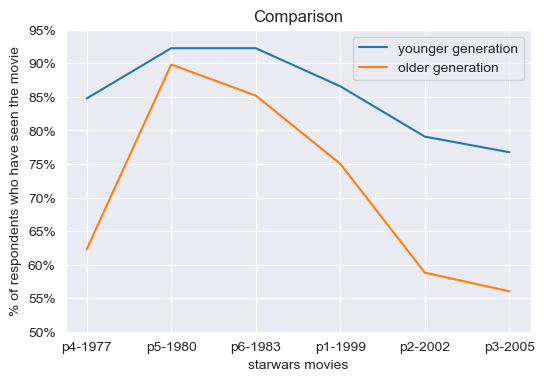

In [65]:
plt.figure(dpi=100)
plt.plot(young)
plt.plot(older)

yticklabels = []
for i in np.arange(0.5,1,0.05): #preparing y tick labels
    yticklabels.append(str(int(i*100))+'%')
    
plt.yticks(np.arange(0.5,1,0.05),yticklabels)
plt.xticks(np.arange(6), release_dates)
plt.xlabel('starwars movies')
plt.ylabel('% of respondents who have seen the movie')
plt.legend(['younger generation','older generation'])
plt.title('Comparison')
plt.show()

Younger generation has seen more of the newer movies and hence have seen more than the older generation on average. Surprisingly, a greater percentage of young people have seen the first starwars movie compared to the older. 

# Further Analysis

This project can be extended further for the following analysis:
- Favourite movies by age
- Effect of income/education on movies seen or their respective rankings
- Favourite characters of starwars universe
- Favourite characters  by demographic
- Analysis of data for movies after part 3(2003) and comparing trends. 